<a href="https://www.kaggle.com/code/mayarmohamedswilam/house-price?scriptVersionId=141808334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Explore the data**

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the training and test datasets
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Impute or Remove Missing Values**

In [6]:
# For numerical features
numerical_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train_data[numerical_features] = train_data[numerical_features].fillna(train_data[numerical_features].mean())

# For categorical features
categorical_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                         'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
                         'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train_data[categorical_features] = train_data[categorical_features].fillna(train_data[categorical_features].mode().iloc[0])

**Domain-Specific Imputation**

In [7]:
train_data['Alley'].fillna('None', inplace=True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [10]:
important_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'SalePrice']
important_data = train_data[important_columns]

In [11]:
# Ask 1: What is the average sale price of houses in the dataset?
avg_sale_price = train_data['SalePrice'].mean()
print("Ans 1: The average sale price is ${:.2f}".format(avg_sale_price))

Ans 1: The average sale price is $180921.20


In [12]:
# Ask 2: What is the most common zoning classification in the dataset?
common_zoning = train_data['MSZoning'].mode()[0]
print("Ans 2: The most common zoning classification is '{}'".format(common_zoning))


Ans 2: The most common zoning classification is 'RL'


In [13]:
# Ask 3: What is the average lot size (LotArea) of houses in the dataset?
avg_lot_size = train_data['LotArea'].mean()
print("Ans 3: The average lot size is {:.2f} square feet".format(avg_lot_size))


Ans 3: The average lot size is 10516.83 square feet


In [14]:
# Ask 4: What is the maximum linear feet of street connected to a property (LotFrontage) in the dataset?
max_lot_frontage = train_data['LotFrontage'].max()
print("Ans 4: The maximum linear feet of street connected to a property is {:.1f}".format(max_lot_frontage))

Ans 4: The maximum linear feet of street connected to a property is 313.0


In [15]:
# Ask 5: How many houses have paved street access (Street column)?
paved_street_count = train_data['Street'].value_counts()['Pave']
print("Ans 5: {} houses have paved street access".format(paved_street_count))

Ans 5: 1454 houses have paved street access


In [16]:
# Ask 6: What is the most common type of alley access to properties (Alley column)?
common_alley = train_data['Alley'].mode()[0]
print("Ans 6: The most common type of alley access is '{}'".format(common_alley))

Ans 6: The most common type of alley access is 'Grvl'


In [17]:
# Ask 7: How many houses have a regular-shaped lot (LotShape column)?
regular_lot_count = train_data['LotShape'].value_counts()['Reg']
print("Ans 7: {} houses have a regular-shaped lot".format(regular_lot_count))


Ans 7: 925 houses have a regular-shaped lot


In [18]:
# Ask 8: What is the flatness level of the majority of properties (LandContour column)?
majority_land_contour = train_data['LandContour'].mode()[0]
print("Ans 8: The majority of properties have a '{}' land contour".format(majority_land_contour))

Ans 8: The majority of properties have a 'Lvl' land contour


In [19]:
# Ask 9: What types of utilities are available for the houses (Utilities column)?
available_utilities = train_data['Utilities'].unique()
print("Ans 9: The available utilities are {}".format(", ".join(available_utilities)))

Ans 9: The available utilities are AllPub, NoSeWa


**Data Visualization**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

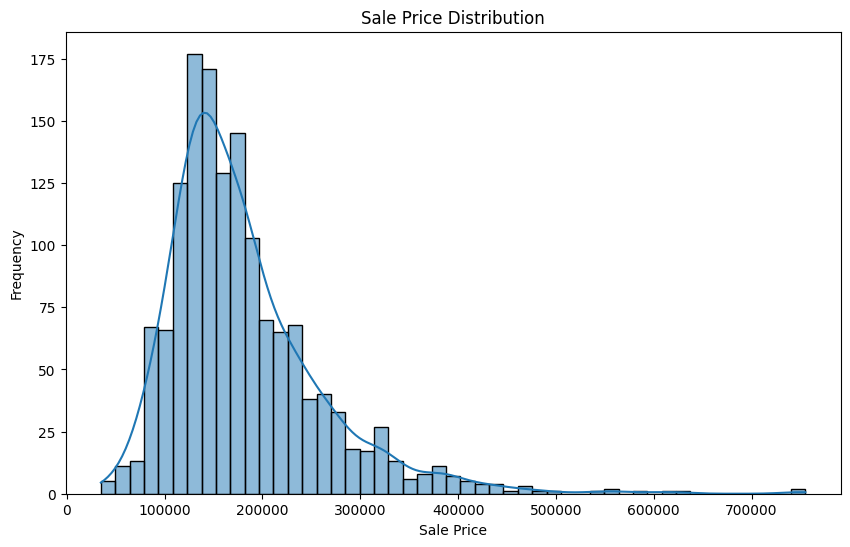

In [21]:
#  Sale Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

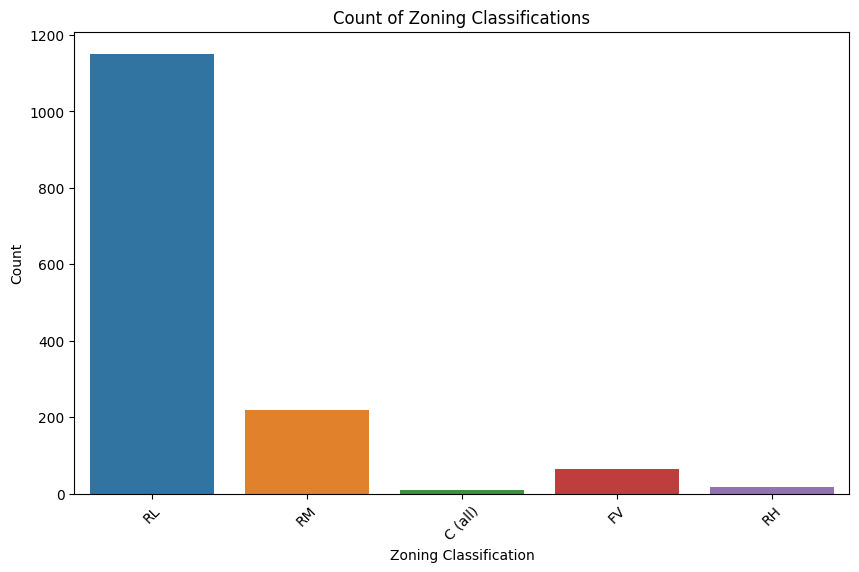

In [22]:
# Count of Zoning Classifications
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='MSZoning')
plt.title('Count of Zoning Classifications')
plt.xlabel('Zoning Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

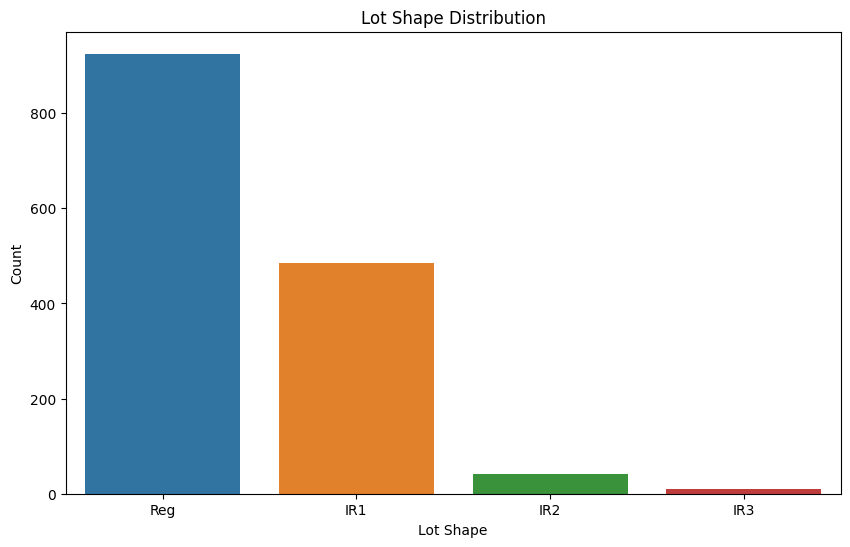

In [23]:
#  Lot Shape Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='LotShape')
plt.title('Lot Shape Distribution')
plt.xlabel('Lot Shape')
plt.ylabel('Count')
plt.show()

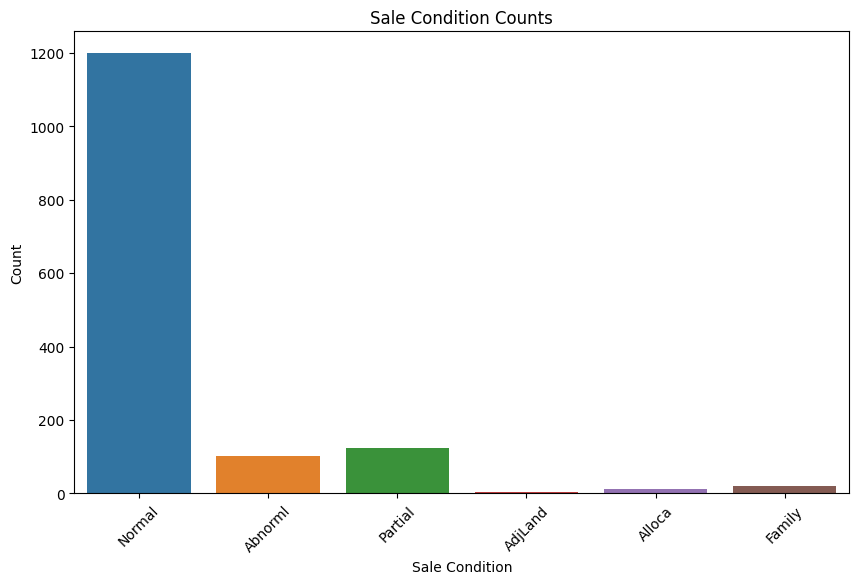

In [24]:
#  Sale Condition Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='SaleCondition')
plt.title('Sale Condition Counts')
plt.xlabel('Sale Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

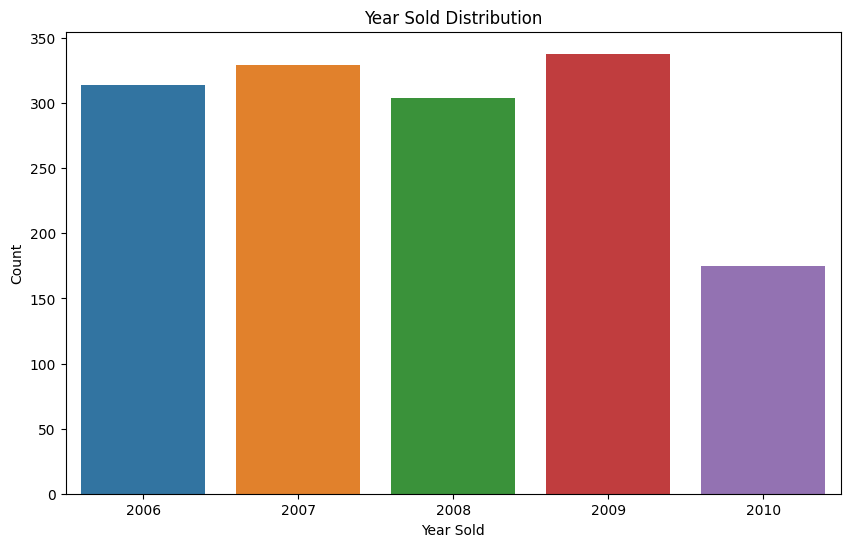

In [25]:
# Year Sold Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='YrSold')
plt.title('Year Sold Distribution')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.show()

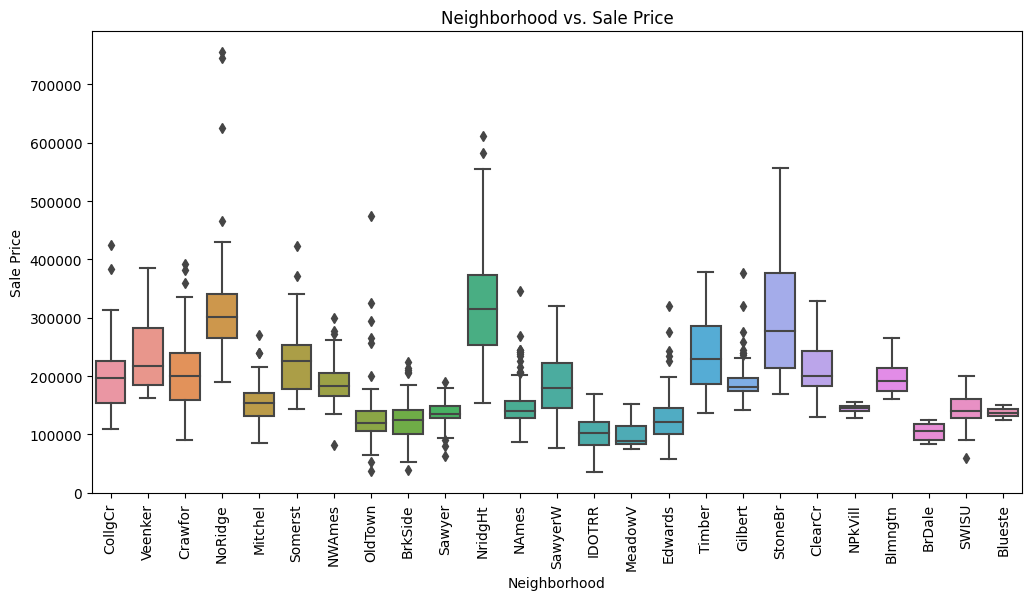

In [26]:
# Neighborhood vs. Sale Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('Neighborhood vs. Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

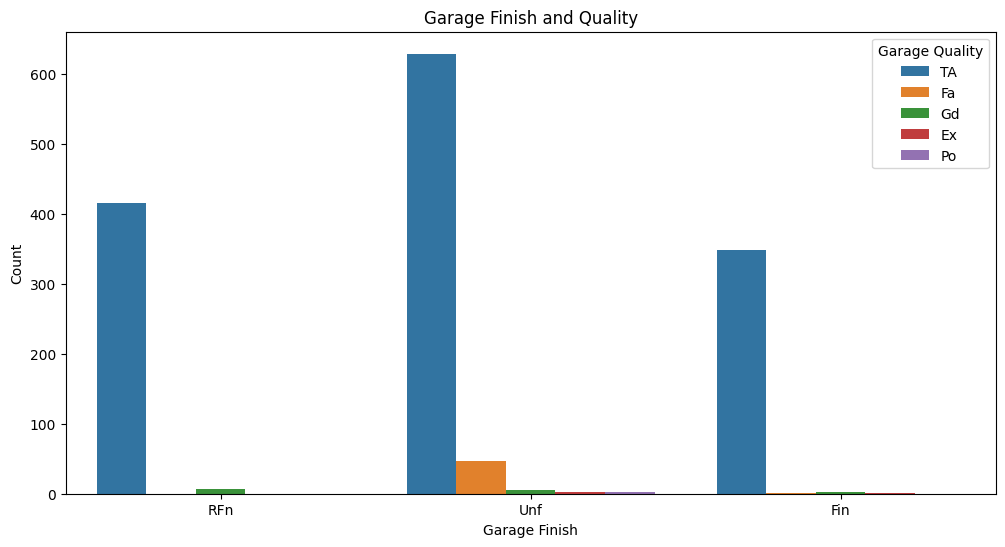

In [27]:
# Data Visualization 14: Garage Finish and Quality
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='GarageFinish', hue='GarageQual')
plt.title('Garage Finish and Quality')
plt.xlabel('Garage Finish')
plt.ylabel('Count')
plt.legend(title='Garage Quality', loc='upper right')
plt.show()

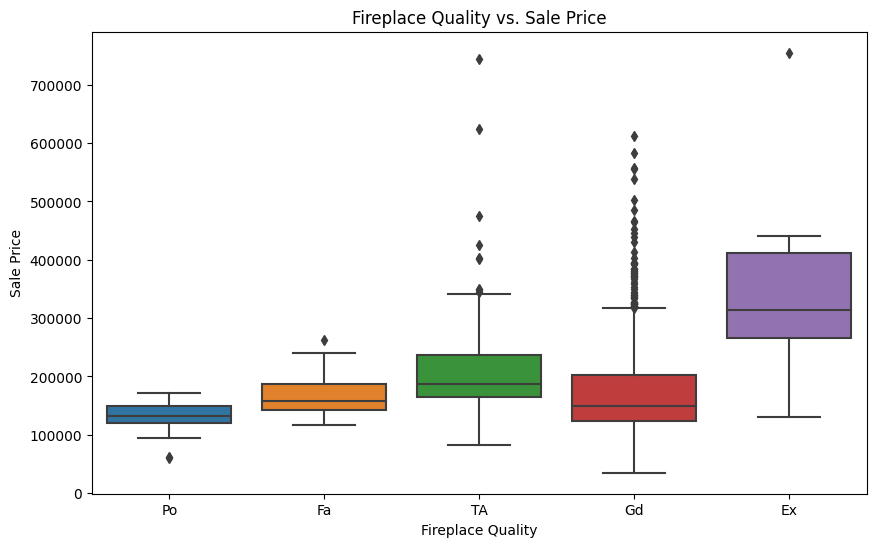

In [28]:
#  Fireplace Quality vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train_data, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('Fireplace Quality vs. Sale Price')
plt.xlabel('Fireplace Quality')
plt.ylabel('Sale Price')
plt.show()

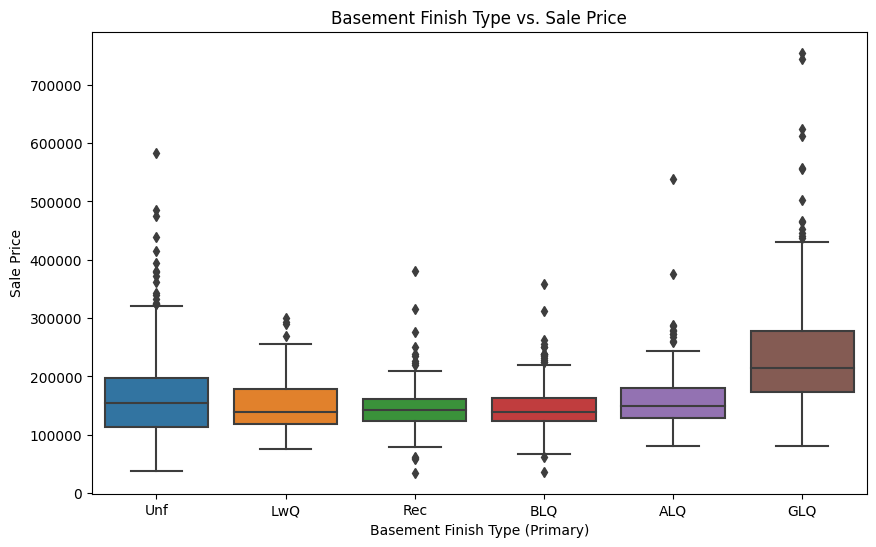

In [29]:
#  Basement Finish Type vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=train_data, order=['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
plt.title('Basement Finish Type vs. Sale Price')
plt.xlabel('Basement Finish Type (Primary)')
plt.ylabel('Sale Price')
plt.show()

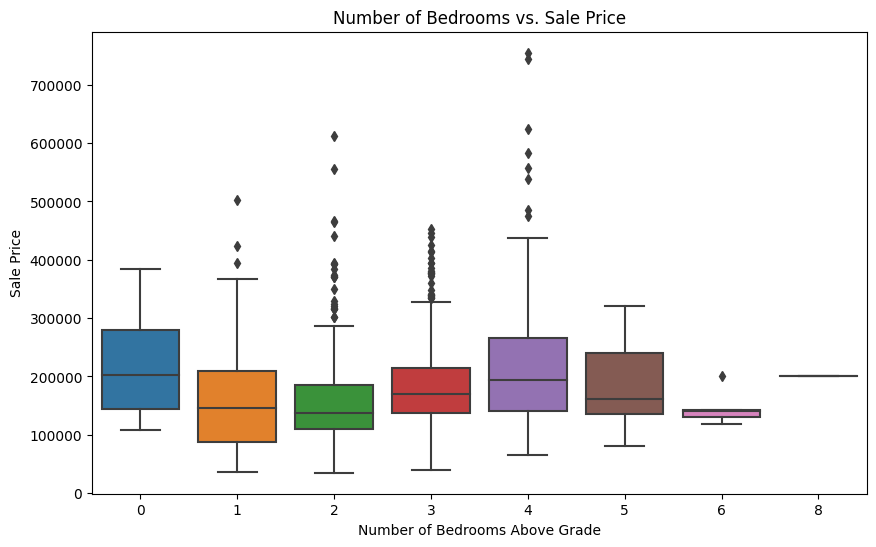

In [30]:
# Number of Bedrooms vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train_data)
plt.title('Number of Bedrooms vs. Sale Price')
plt.xlabel('Number of Bedrooms Above Grade')
plt.ylabel('Sale Price')
plt.show()

**ML MODEL**

In [31]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# Load the dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Data Preprocessing
# Handle missing values
data.dropna(subset=['SalePrice'], inplace=True)  # Drop rows with missing target (SalePrice)
data.fillna(0, inplace=True)  # Fill remaining missing values with 0

In [32]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
# Feature selection
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = data[features]
y = data['SalePrice']

In [34]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 1576962754.88
Mean Absolute Error (MAE): 25319.86
R-squared (R2): 0.79


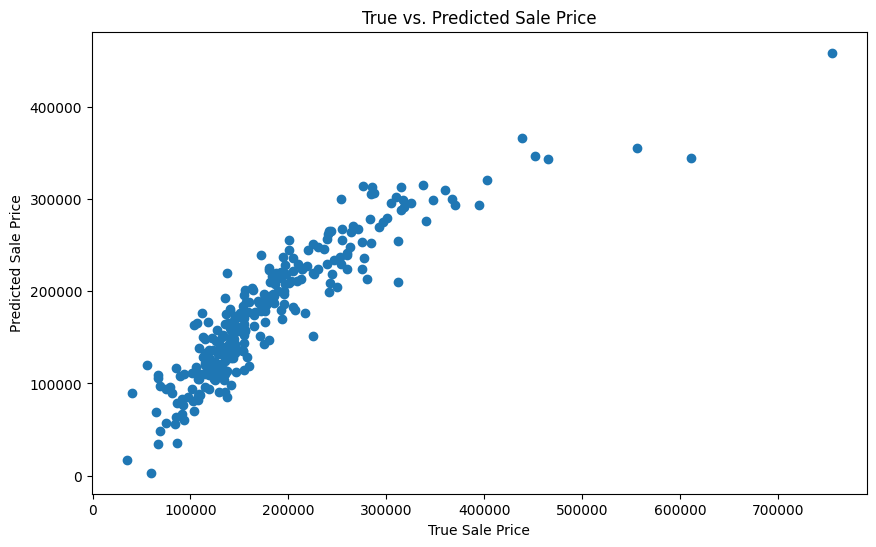

In [39]:
# Visualization of Predictions vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs. Predicted Sale Price")
plt.show()

In [40]:
# Save the trained model
import joblib
joblib.dump(model, 'house_price_prediction_model.pkl')

['house_price_prediction_model.pkl']